# CVRP Notebook
This notebook is intended to run the top level code for the CVRP

In [1]:
import networkx as nx

from model import VRP, create_constraints, output_variables
from pricer import VRPPricer
from parse import parse

from matplotlib import pyplot as plt

In [6]:
# Test instance E-n22-k4 provided by parser
# G = parse("Instances/E/E-n22-k4.vrp")
# G = parse("Instances/E/E-n23-k3.vrp")
# G = parse("Instances/E/E-n30-k3.vrp")
# G = parse("Instances/E/E-n33-k4.vrp")
# G = parse("Instances/E/E-n51-k5.vrp")
# G = parse("Instances/E/E-n76-k14.vrp")
# G = parse("Instances/E/E-n101-k14.vrp")
# G = parse("Instances/Uchoa/X-n101-k25.vrp")
# G.graph['min_trucks'] = 26
# G = parse("Instances/Uchoa/X-n106-k14.vrp")
# G.graph['min_trucks'] = 14
# G = parse("Instances/Uchoa/X-n110-k13.vrp")
# G.graph['min_trucks'] = 13
# G = parse("Instances/Uchoa/X-n115-k10.vrp")
# G.graph['min_trucks'] = 10
# G = parse("Instances/Uchoa/X-n120-k6.vrp")
# G.graph['min_trucks'] = 6
# G = parse("Instances/Uchoa/X-n125-k30.vrp")
# G.graph['min_trucks'] = 30
# G = parse("Instances/Uchoa/X-n129-k18.vrp")
# G.graph['min_trucks'] = 18
# G = parse("Instances/Uchoa/X-n200-k36.vrp")
# G.graph['min_trucks'] = 36
# G = parse("Instances/Uchoa/X-n228-k23.vrp")
# G.graph['min_trucks'] = 23
# G = parse("Instances/Uchoa/X-n251-k28.vrp")
# G.graph['min_trucks'] = 28
G = parse("Instances/Uchoa/X-n256-k16.vrp")
G.graph['min_trucks'] = 16

PARSE: There is no minimum number of trucks.


In [ ]:
model = VRP(G)

# Create pricer
pricer = VRPPricer()
pricer.init_data(G)
pricer.data['methods'] = ["SPPRC"]
pricer.data['max_vars']= 100
pricer.data['time_limit'] = 10

model.includePricer(pricer, "pricer","does pricing")

create_constraints(model,G,heuristic_time=10)

model.optimize()
model.hideOutput(quiet=False)

HYGESE: Found Solution with value 18941.0
PRICER_PY: The maximal path length is 27
PY PRICING: The neighborhood has been fixed to 8 neighbors.
PRICER_C: Graph data successfully copied to C.
presolving:
presolving (1 rounds: 1 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 271 variables (0 bin, 0 int, 0 impl, 271 cont) and 256 constraints
    256 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.1s|     1 |     0 |    34 |     - |    LP  |   0 | 271 | 256 | 256 |   0 |  0 |   0 |   0 |      --      | 1.894100e+04 |    Inf | unknown
  6.9s|     1 |     0 |    49 |     - |  2597k |   0 | 371 | 256 | 256 |   0 |  0 |   0 |   0 |      --      | 1.894100e+04 |    Inf | unknown
PR

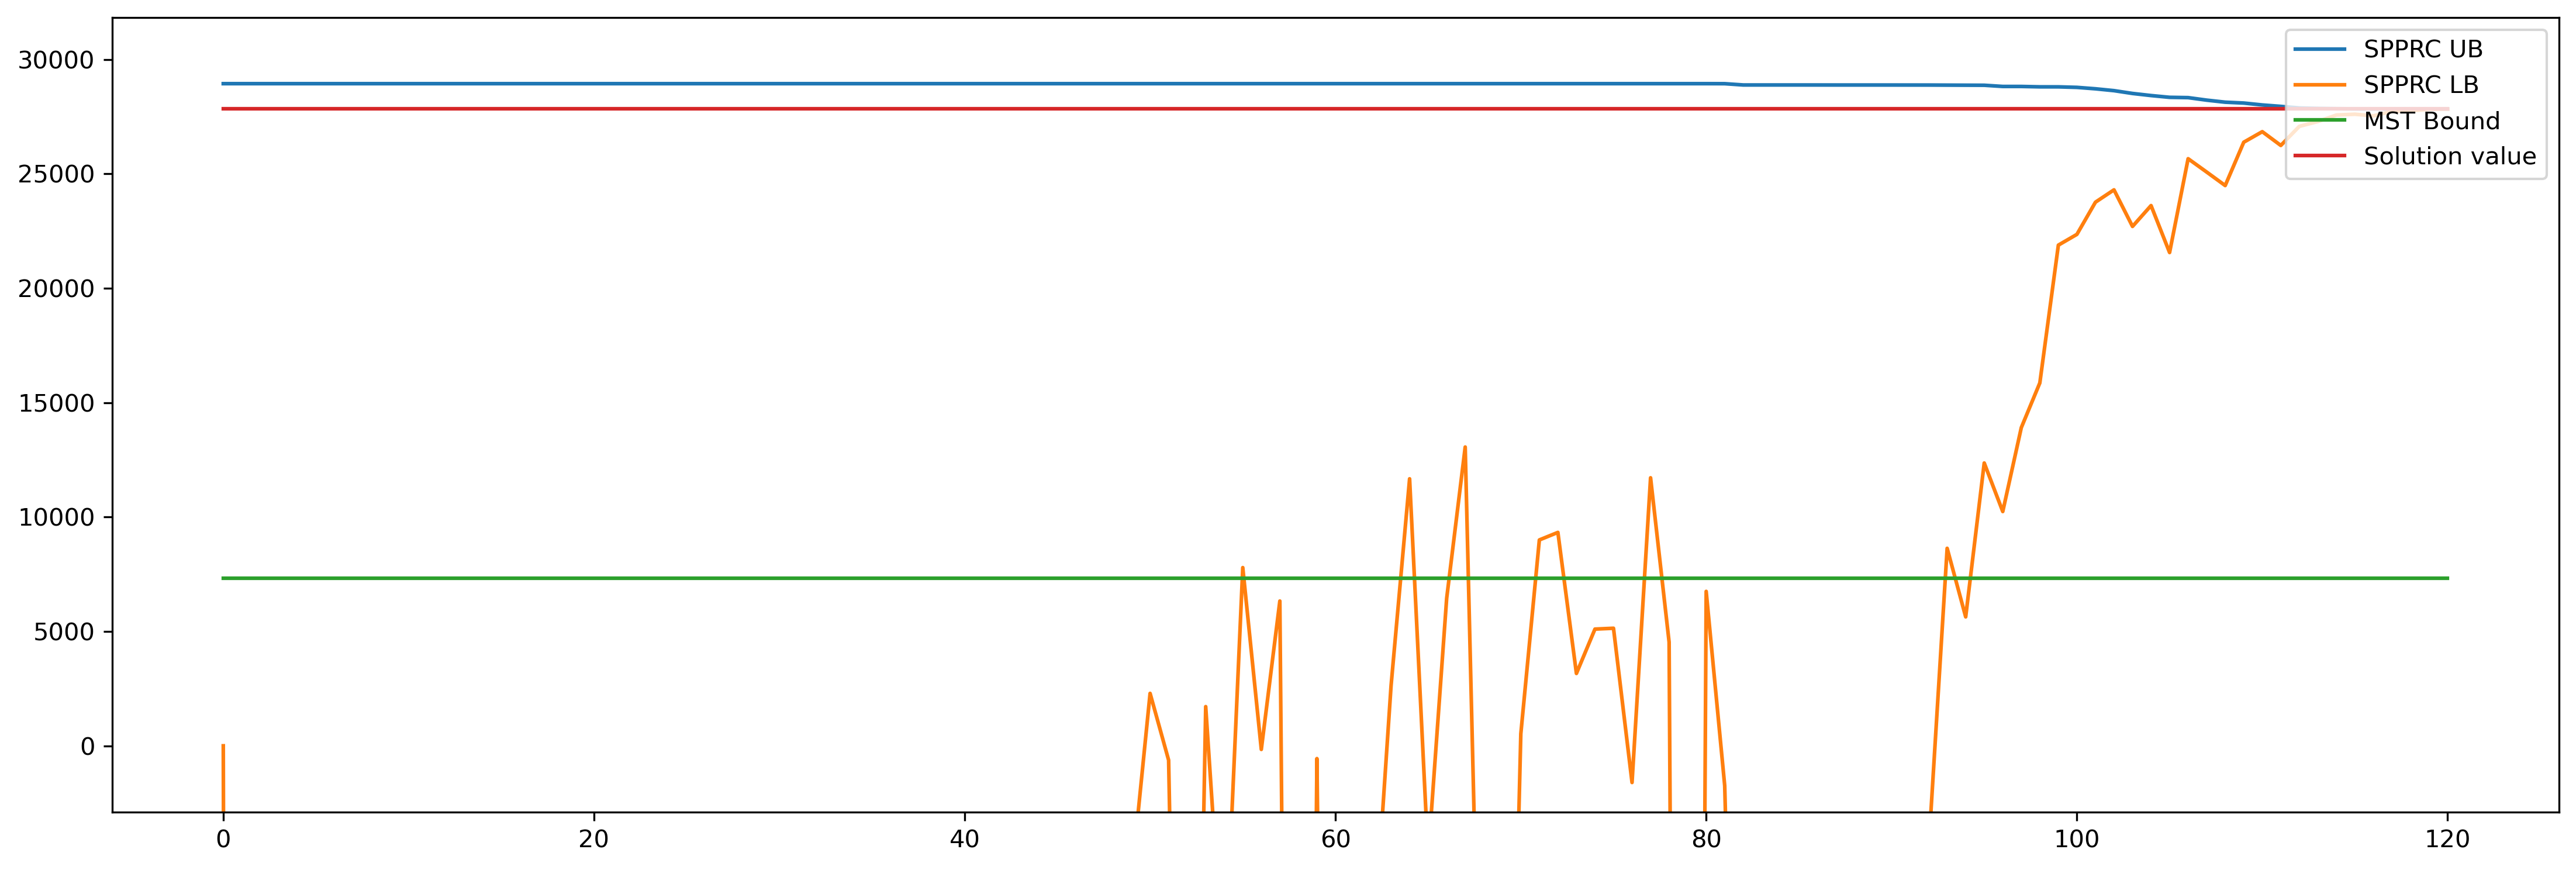

In [8]:
plt.figure(figsize=(18,6),dpi=300)
xmax = 0
for method in pricer.data['methods']:
    upper_bounds = [x for x,y in pricer.data['bounds'][method]]
    lower_bounds = [y for x,y in pricer.data['bounds'][method]]
    plt.plot(upper_bounds, label=f'{method} UB')
    plt.plot(lower_bounds, label=f'{method} LB')
    if upper_bounds[0] > xmax:
        xmax = upper_bounds[0]
plt.ylim((-xmax/10,xmax*1.1))

T = nx.minimum_spanning_tree(G)
mst = T.size(weight='weight') + min(G.edges().data('weight'),key=lambda edge: edge[2])[2]
mst = [mst for i in range(len(upper_bounds))]
plt.plot(mst, label="MST Bound")

solval = model.getObjVal()
sol = [solval for i in range(len(upper_bounds))]
plt.plot(sol,label="Solution value")

plt.legend(loc='upper right')

plt.show()

In [6]:
output_variables(model, pricer)

The solution contains the following paths: 
Only paths with associated value larger than 1e-06 are analysed.
0.8319681677018624 * t_x10: (0, 10, 0)
The following path is non elementary
0.07989315466519727 * x34936: (0, 104, 41, 91, 2, 91, 41, 104, 0)
The following path is non elementary
0.0003105590062161069 * x66439: (0, 50, 52, 21, 82, 21, 82, 21, 82, 88, 9, 88, 82, 21, 52, 50, 0)
The following path is non elementary
0.33333333333333337 * x66845: (0, 13, 70, 36, 56, 31, 11, 31, 56, 36, 70, 13, 0)
The following path is non elementary
0.058695652173911095 * x68668: (0, 50, 52, 21, 82, 21, 82, 88, 82, 88, 9, 88, 82, 21, 52, 50, 0)
The following path is non elementary
0.0936084624777159 * x70422: (0, 104, 41, 91, 2, 91, 41, 16, 66, 17, 32, 15, 0)
The following path is non elementary
0.09988879127630973 * x70577: (0, 104, 41, 91, 2, 91, 41, 16, 66, 17, 89, 32, 15, 0)
The following path is non elementary
0.32344720496894247 * x71430: (0, 52, 21, 82, 88, 9, 54, 9, 88, 52, 0)
The following p